In [1]:
# imports - basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# imports modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# import custom stop words
from customstopwords import custom_stop_lem

In [2]:
# read in EDA cleaned file
df = pd.read_csv('../CommentFiles/Comments_EDA_lem.csv')

## Note: 
Dataframe looks like it is ready to model, classes are still 50/50 split.
Steps in modeling process:
1. Convert subreddit into binary labels.
2. Set up X, y variables and split the data into training and testing sets.
3. Pre-processing, use countvectorizer to convert text data into structed, numeric X dataframe.
4. Fit and tranform the vectorized text.
5. Check for top occuring words and continue some EDA.
6. Create stop words list.
7. Model using logistic regression.

In [3]:
# convert subreddit into binary labels
df['subreddit'] = df['subreddit'].map({'sportsbook': 1, 'dfsports': 0})

In [4]:
# set X and y variables
X = df['body']
y = df['subreddit']

In [5]:
#TTS
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [6]:
# Instantiate CountVectorizer
cvec = CountVectorizer(stop_words=custom_stop_lem)

In [16]:
# Fit and transform data sets
X_train_cvec = cvec.fit_transform(X_train.astype(str))

In [18]:
# transform test data
X_test_cvec = cvec.transform(X_test.astype(str))

In [19]:
# model using logistic regression
logreg = LogisticRegression()

In [20]:
# fit model to countvectorized data sets
logreg.fit(X_train_cvec, y_train)

LogisticRegression()

In [21]:
# score train and test
print('Train Score: ', logreg.score(X_train_cvec, y_train))
print('Test Score : ', logreg.score(X_test_cvec, y_test))

Train Score:  0.9447278911564626
Test Score :  0.8425748884639898


## Annotation:
The lemmatized words and the addition of the stop words made little impact on the scores.  The testing score increased slightly and the training score decreased slightly closing the gap between the two.

In [22]:
# cross val score
cross_val_score(logreg, X_train_cvec, y_train, cv=5).mean()

0.821641983403803

In [23]:
# accuracy score
y_preds = logreg.predict(X_test_cvec)
accuracy_score(y_test, y_preds)

0.8425748884639898

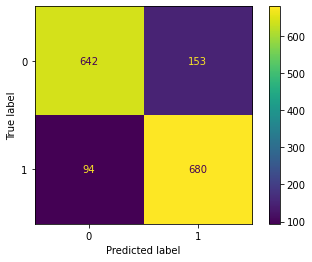

In [24]:
# confusion matrix, to plot and set values for further calculations
cm = confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = cm.ravel()
ConfusionMatrixDisplay(cm).plot();

In [25]:
# calculate the specificity, ability to pick true negatives
spec = tp/(tp+fn)
spec

0.8785529715762274

In [26]:
# calculate sensitivity, ability to pick out true positives
sens = tn/(tn+fp)
sens

0.8075471698113208

## Annotation:
Overall accuracy improved slightly; with and increase in sensitivity and decrease in specificity.  Still the model's effectiveness at predicting sportsbook correctly is less than overall accuracy.

In [28]:
# TF-IDF attempt
tvec = TfidfVectorizer(stop_words=custom_stop_lem)

In [30]:
# fit and transform to tvec training data
X_train_tvec = tvec.fit_transform(X_train.astype(str))

In [31]:
# transform to tvec test data
X_test_tvec = tvec.transform(X_test.astype(str))

In [32]:
# model using logistic regression
logreg = LogisticRegression()

In [33]:
# fit model to countvectorized data sets
logreg.fit(X_train_tvec, y_train)

LogisticRegression()

In [34]:
# score train and test
print('Train Score: ', logreg.score(X_train_tvec, y_train))
print('Test Score : ', logreg.score(X_test_tvec, y_test))

Train Score:  0.9283588435374149
Test Score :  0.8432122370936902


In [35]:
# cross val score
cross_val_score(logreg, X_train_tvec, y_train, cv=5).mean()

0.8295057317927961

In [40]:
# accuracy score
y_preds = logreg.predict(X_test_tvec)
accuracy_score(y_test, y_preds)

0.8432122370936902

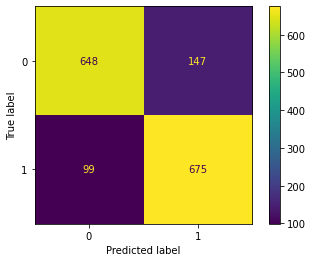

In [37]:
# confusion matrix, to plot and set values for further calculations
cm = confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = cm.ravel()
ConfusionMatrixDisplay(cm).plot();

In [38]:
# calculate the specificity, ability to pick true negatives
spec = tp/(tp+fn)
spec

0.872093023255814

In [39]:
# calculate sensitivity, ability to pick out true positives
sens = tn/(tn+fp)
sens

0.8150943396226416

## Annotation:
The TD-IDF tranformer did not return a better model.  Very similar scores to count vectorizer with logistic regression.  Going forward different estimators will be used and gridsearch to pick most effective parameters for these transformers.